<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Endoscopy_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas scikit-learn
!pip install tensorflow opencv-python tqdm matplotlib

Loading and preprocessing data...


Loading ulcerative-colitis: 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]



Training traditional ML models...

Traditional ML Results:
Random Forest: 0.4615
SVM: 0.4615
Logistic Regression: 0.4615

Classification Reports:
Random Forest:
                        precision    recall  f1-score   support

    dyed-lifted-polyps       1.00      0.33      0.50         3
dyed-resection-margins       0.50      0.50      0.50         2
           esophagitis       0.00      0.00      0.00         1
        normal-pylorus       0.00      0.00      0.00         1
         normal-z-line       0.33      1.00      0.50         1
                polyps       0.00      0.00      0.00         2
    ulcerative-colitis       0.75      1.00      0.86         3

             micro avg       0.50      0.46      0.48        13
             macro avg       0.37      0.40      0.34        13
          weighted avg       0.51      0.46      0.43        13

SVM:
                        precision    recall  f1-score   support

    dyed-lifted-polyps       0.00      0.00      0.00        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.0312 - loss: 2.5983 - val_accuracy: 0.0000e+00 - val_loss: 2.4364
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 458ms/step - accuracy: 0.1979 - loss: 2.1310 - val_accuracy: 0.0625 - val_loss: 2.1205
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 427ms/step - accuracy: 0.2083 - loss: 2.0365 - val_accuracy: 0.0625 - val_loss: 2.1248
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 776ms/step - accuracy: 0.2812 - loss: 1.9777 - val_accuracy: 0.0625 - val_loss: 2.0721
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 479ms/step - accuracy: 0.3333 - loss: 1.8367 - val_accuracy: 0.0625 - val_loss: 1.9675
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 474ms/step - accuracy: 0.2292 - loss: 1.6800 - val_accuracy: 0.1250 - val_loss: 1.7863
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 442ms/step - accuracy: 0.3750 - loss: 1.4697 - val_accuracy: 0.2500 - val_loss: 1.7286
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step - accuracy: 0.3438 - loss: 1.3220 - val_accuracy: 0.3750 - val_los

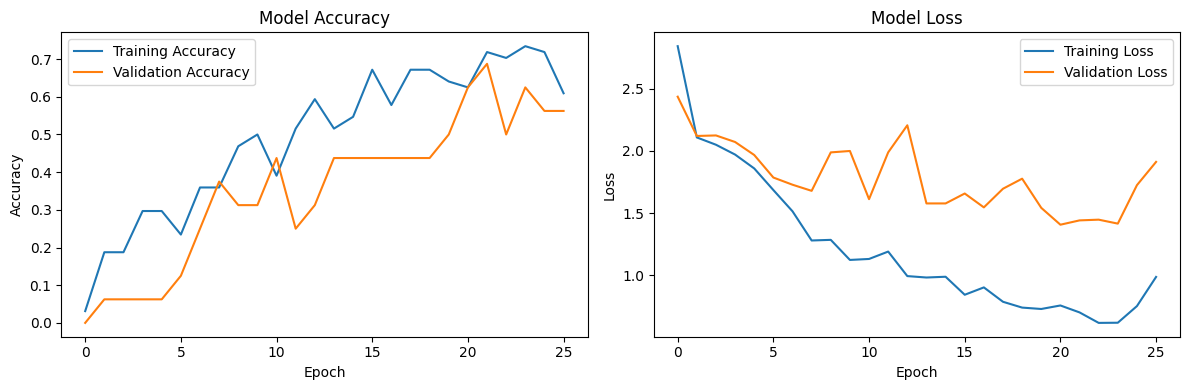

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import cv2
from tqdm import tqdm

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

def load_and_preprocess_images(data_dir, target_size=(224, 224)):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    valid_class_names = []
    class_to_idx = {}

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            has_images = False
            for img_name in tqdm(os.listdir(class_dir), desc=f"Loading {class_name}"):
                img_path = os.path.join(class_dir, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    images.append(img)
                    labels.append(label)
                    has_images = True
            if has_images:
                valid_class_names.append(class_name)
                class_to_idx[class_name] = label

    return np.array(images), np.array(labels), valid_class_names

# 2. Traditional ML Models
def train_ml_models(X, y):
    # Flatten images for traditional ML
    X_flat = X.reshape(X.shape[0], -1)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_flat, y, test_size=0.2, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Dictionary to store results
    results = {}

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    rf_pred = rf.predict(X_test_scaled)
    results['Random Forest'] = accuracy_score(y_test, rf_pred)

    # SVM
    svm = SVC(kernel='rbf', random_state=42)
    svm.fit(X_train_scaled, y_train)
    svm_pred = svm.predict(X_test_scaled)
    results['SVM'] = accuracy_score(y_test, svm_pred)

    # Logistic Regression
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(X_train_scaled, y_train)
    lr_pred = lr.predict(X_test_scaled)
    results['Logistic Regression'] = accuracy_score(y_test, lr_pred)

    return results, y_test, rf_pred, svm_pred, lr_pred

# 3. Deep Learning Model (CNN)
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# Main execution
def main():
    # Set your data directory path
    data_dir = "/content/drive/MyDrive/Vazir Dataset"  # Update this path

    # Load and preprocess data
    print("Loading and preprocessing data...")
    X, y, class_names = load_and_preprocess_images(data_dir)

    # Split data for ML and DL
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train traditional ML models
    print("\nTraining traditional ML models...") # Fixed indentation here
    ml_results, y_test_ml, rf_pred, svm_pred, lr_pred = train_ml_models(X_train, y_train)

    # Get unique labels that actually appear in the test set
    unique_labels = np.unique(y_test_ml)

    # Print ML results
    print("\nTraditional ML Results:")
    for model, accuracy in ml_results.items():
        print(f"{model}: {accuracy:.4f}")

    # Print detailed classification reports with explicit labels
    print("\nClassification Reports:")
    print("Random Forest:")
    print(classification_report(
        y_test_ml,
        rf_pred,
        labels=unique_labels,
        target_names=[class_names[i] for i in unique_labels]
    ))
    print("SVM:")
    print(classification_report(
        y_test_ml,
        svm_pred,
        labels=unique_labels,
        target_names=[class_names[i] for i in unique_labels]
    ))
    print("Logistic Regression:")
    print(classification_report(
        y_test_ml,
        lr_pred,
        labels=unique_labels,
        target_names=[class_names[i] for i in unique_labels]
    ))

    # Data augmentation for deep learning
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Normalize pixel values
    X_train_dl = X_train / 255.0
    X_test_dl = X_test / 255.0

    # Create and train CNN model
    print("\nTraining CNN model...")
    cnn_model = create_cnn_model(input_shape=(224, 224, 3), num_classes=len(class_names))

    # Early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    # Train the model
    history = cnn_model.fit(
        datagen.flow(X_train_dl, y_train, batch_size=32),
        epochs=50,
        validation_data=(X_test_dl, y_test),
        callbacks=[early_stopping]
    )

    # Evaluate CNN
    test_loss, test_accuracy = cnn_model.evaluate(X_test_dl, y_test)
    print(f"\nCNN Test Accuracy: {test_accuracy:.4f}")

    # Plot training history
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
    return unique_labels,class_names

if __name__ == "__main__":
    unique_labels,class_names = main()

In [4]:
print(f"Number of unique classes in test set: {len(unique_labels)}")
print(f"Class names: {[class_names[i] for i in unique_labels]}")

Number of unique classes in test set: 7
Class names: ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']
